In [39]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import os
import matplotlib.ticker as ticker
import pandas as pd
from pandas import Series, DataFrame
import networkx as nx
import warnings

warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import os
import matplotlib.ticker as ticker
import openpyxl













In [40]:
#모두 출력 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [123]:
#%%#한글 오류 해결
import matplotlib
from matplotlib import font_manager, rc
import platform
try:
    if platform.system() == 'Windows':
        # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        # Mac인 경우
        rc('font', family='AppleGothic')
except:
    pass
matplotlib.rcParams['axes.unicode_minus'] = False


In [ ]:
#plt.rcParams['font.family'] = 'Meslo LG M for Powerline'


In [95]:
#총 금액 없이 카테고리별 묶음
path = os.chdir(r"/Users/kylee/Desktop/대외활동및공부/신한빅데이터해커톤")
os.listdir()
#데이터 불러오기
df1 = pd.read_csv("data_038_1.csv", header = 0 )
df2 = pd.read_excel("schema.xlsx")
df1.head()
temp_dat = df1.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['교통수단_관리'] =0
temp_dat['제조업'] =0
temp_dat['전문서비스'] =0
temp_dat['생활서비스'] =0
temp_dat['장비및화물운송'] =0
temp_dat['농업'] =0
temp_dat['전자기기'] =0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif((i <= 159 and i >= 158) or i == 119 or  (i <= 166 and i >= 165) ):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    elif((i <= 151 and i >= 150) ):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i <= 132 and i >= 129) ):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif((i <= 128 and i >= 127) or i == 133 or  (i <= 136 and i >= 135) or i == 154):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif((i <= 126 and i >= 124) ):
        temp_dat['장비및화물운송'] += temp_dat[f"B{i}"]
    elif(i == 28 ):
        temp_dat["농업"] += temp_dat[f"B{i}"]  
    elif(i == 33 ):
        temp_dat["전자기기"] += temp_dat[f"B{i}"]  
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

        
#총 금액

#데이터 불러오기
temp_dat_total = df1.copy()
temp_dat_total = temp_dat_total["B167"]
temp_dat_total

['data_038_1.csv',
 '~$schema_수정_최종.xlsx',
 '개막식 주제 설명_신한금융그룹',
 'schema.xlsx',
 'kylee',
 'schema_수정.xlsx',
 '.git',
 'main.py',
 'schema_수정_최종.xlsx',
 '통합 문서1.xlsx']

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4350000,210,0.0,0.000000e+00,1.111111e+10,0,1.111110e+11,1.100000e+09
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,580000,40,0.0,0.000000e+00,0.000000e+00,0,1.111100e+11,1.000000e+10
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,1950000,50,0.0,1.101101e+09,0.000000e+00,0,1.111010e+11,1.011010e+11
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,43000000,50,0.0,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,4910000,40,0.0,1.111110e+11,0.000000e+00,0,1.111110e+11,1.111110e+11


0          4350000
1           580000
2          1950000
3         43000000
4          4910000
            ...   
473223      650000
473224     4790000
473225     1650000
473226     1340000
473227      750000
Name: B167, Length: 473228, dtype: int64

In [96]:
q1 = temp_dat['B167'].quantile(q=0.25, interpolation='nearest')  # q1 quantile
q2 = temp_dat['B167'].quantile(q=0.5, interpolation='nearest')  # q2 quantile
q3 = temp_dat['B167'].quantile(q=0.75, interpolation='nearest')  # q3 quantile
q4 = temp_dat['B167'].quantile(q=0.8, interpolation='nearest')  # q4 quantile
q5 = temp_dat['B167'].quantile(q=0.85, interpolation='nearest')  # q5 quantile
q6 = temp_dat['B167'].quantile(q=0.9, interpolation='nearest')  # q6 quantile




# 매출을 구간에 따라 나눠줌 (sell_rank 열에 넣어줌)
consume_rank = pd.cut(temp_dat['B167'],
                   bins=[0, q1, q2, q3, q4, q5, q6,  np.inf],
                   right=False,
                   labels=["7등급","6등급","5등급","4등급", "3등급", "2등급", "1등급"])
temp_dat["consume_rank"] = consume_rank


In [94]:
#temp_dat.loc[:, "consume_rank"]
temp_dat.loc[:, ["consume_rank", "B167"]]
#temp_dat.columns

,consume_rank,B167
0,2등급,4350000
1,8등급,580000
2,6등급,1950000
3,2등급,43000000
4,2등급,4910000
...,...,...
473223,8등급,650000
473224,2등급,4790000
473225,6등급,1650000
473226,6등급,1340000


<AxesSubplot:xlabel='consume_rank'>

Text(0.5, 1.0, '등급에 따른 카테고리 평균 지출액')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '7등급'),
  Text(1, 0, '6등급'),
  Text(2, 0, '5등급'),
  Text(3, 0, '4등급'),
  Text(4, 0, '3등급'),
  Text(5, 0, '2등급'),
  Text(6, 0, '1등급')])

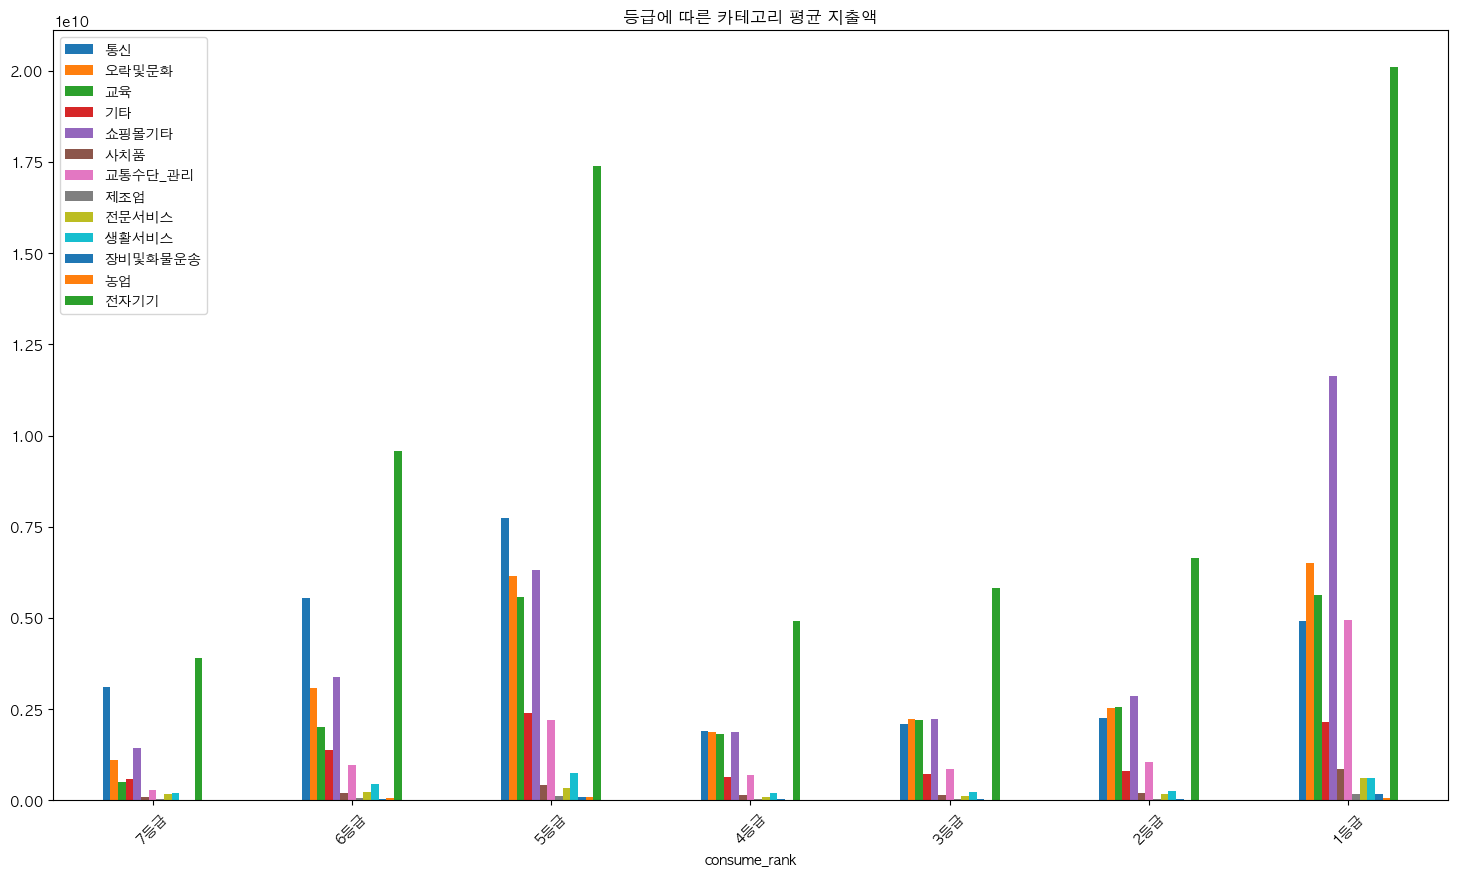

In [97]:
#1. 등급에 따른 카테고리 평균 지출액
temp_groupby = temp_dat.groupby("consume_rank").sum().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
#plt.ylim([0 ,5*10^8 ])
plt.show()



In [26]:
#출력창 크기 조절
# pd.set_option("display.max.colwidth", 100)
# pd.set_option("display.max_rows", 100)

<AxesSubplot:>

Text(0.5, 1.0, '8등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

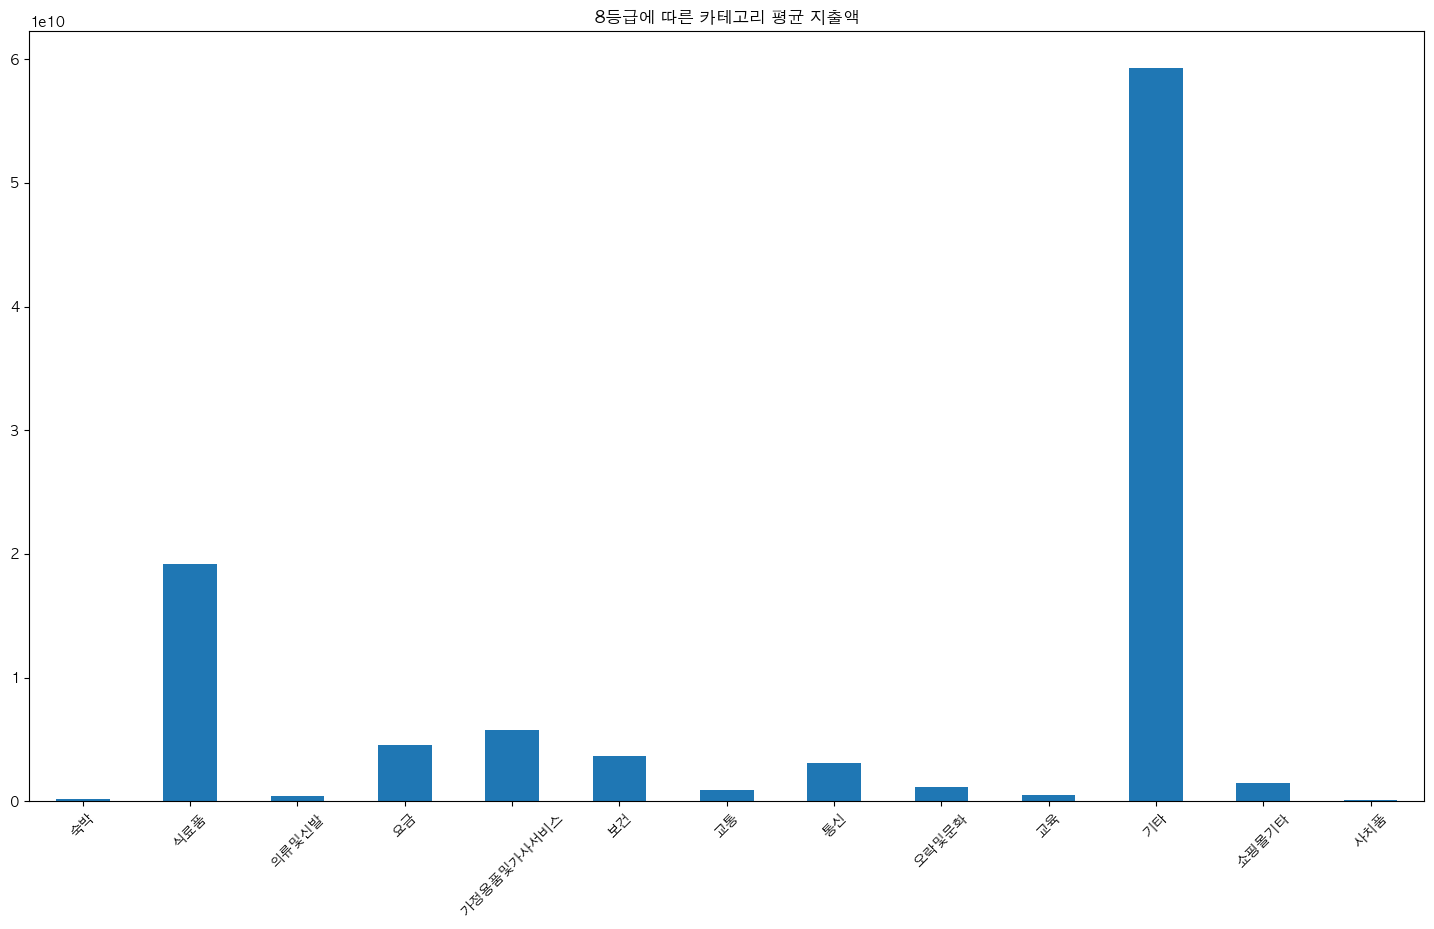

<AxesSubplot:>

Text(0.5, 1.0, '7등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

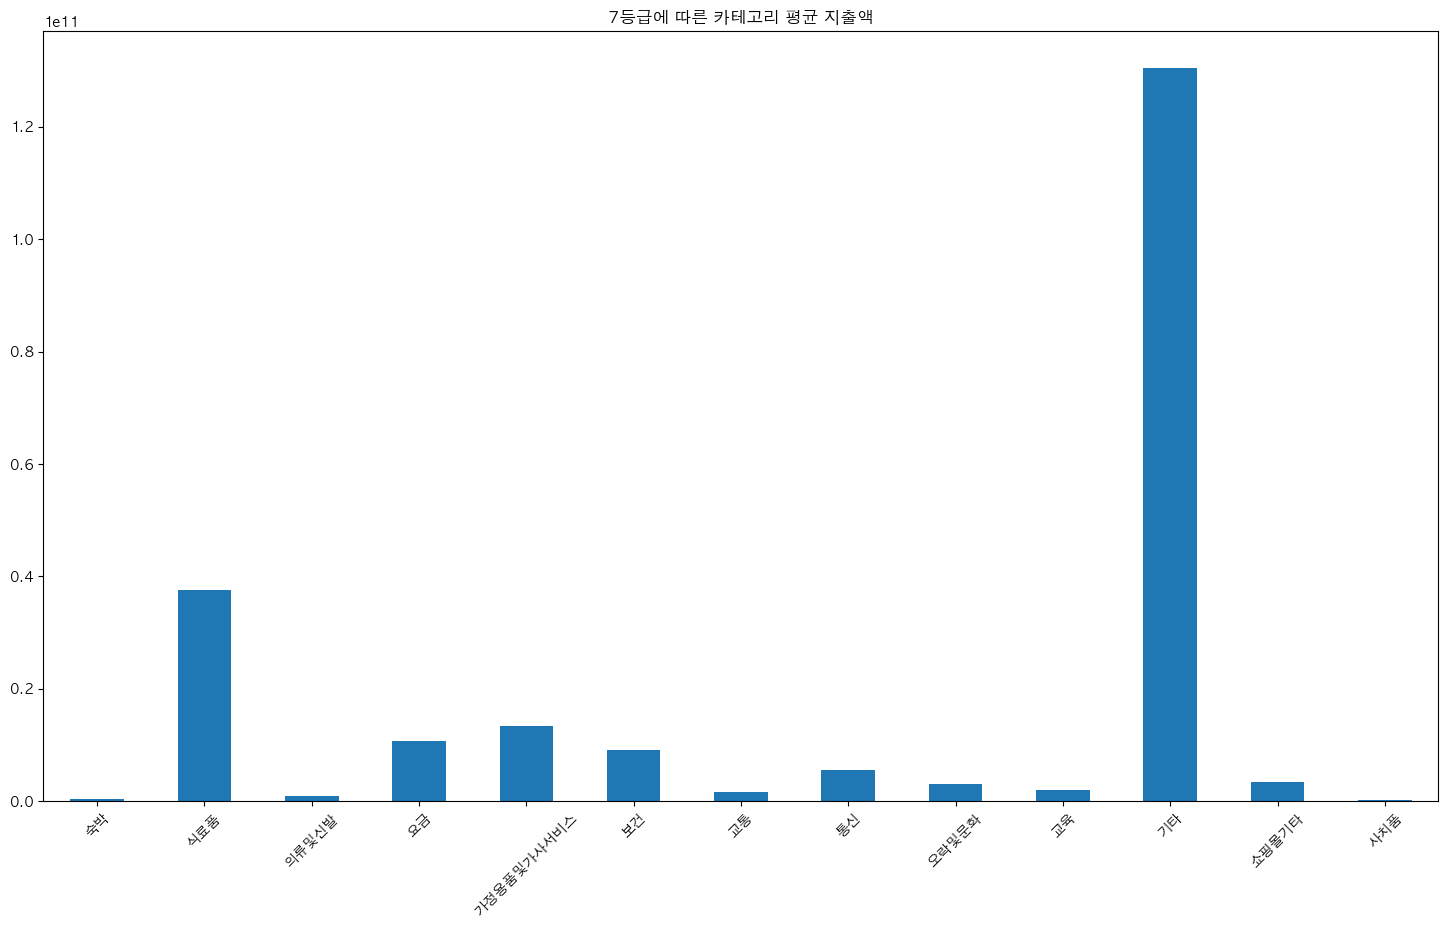

<AxesSubplot:>

Text(0.5, 1.0, '6등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

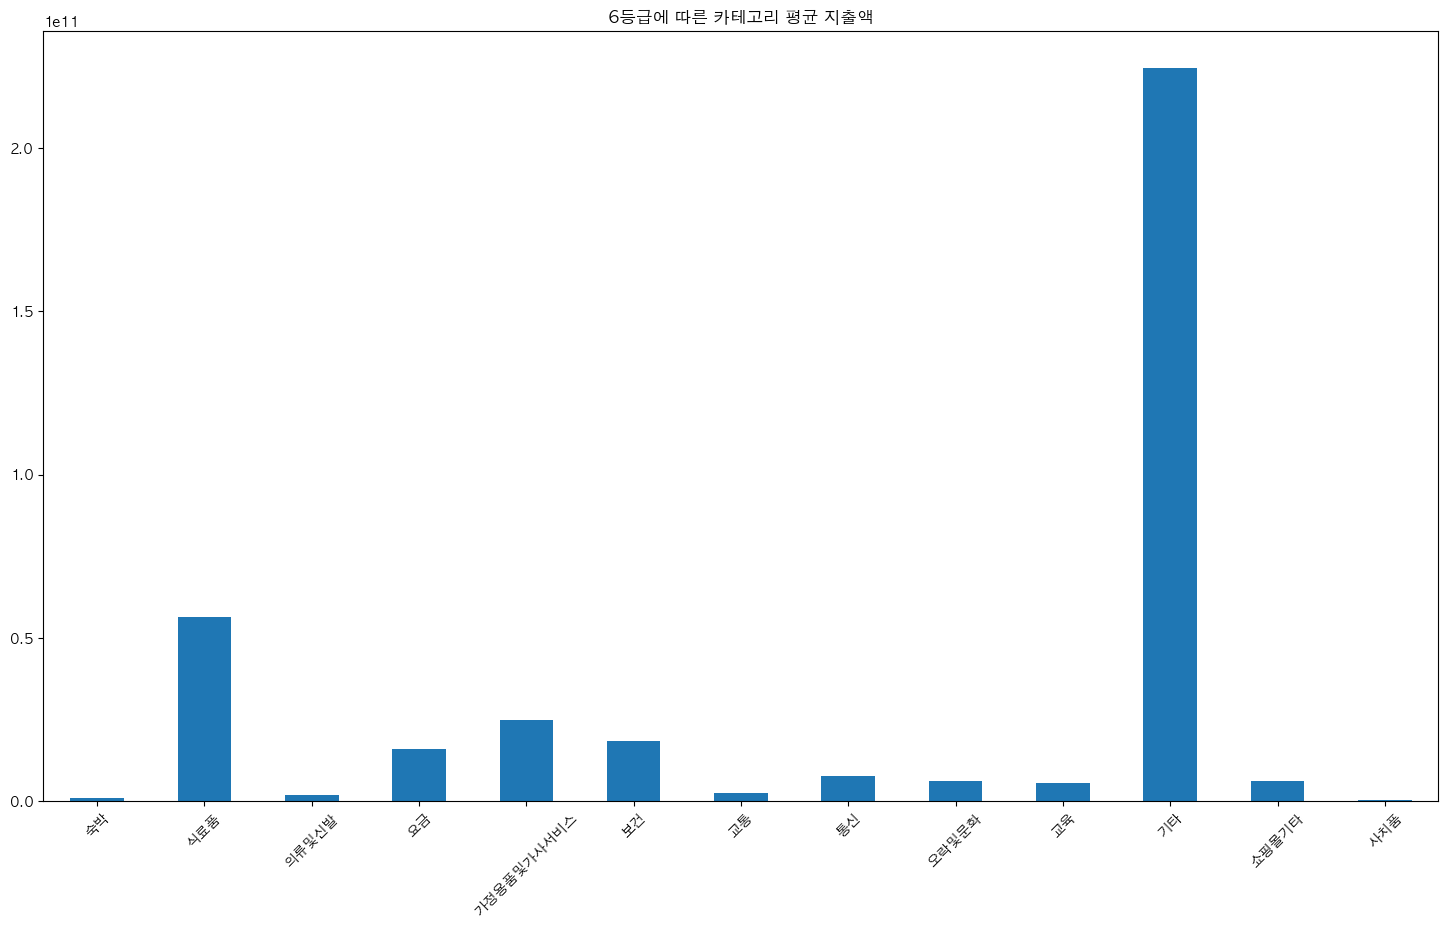

<AxesSubplot:>

Text(0.5, 1.0, '5등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

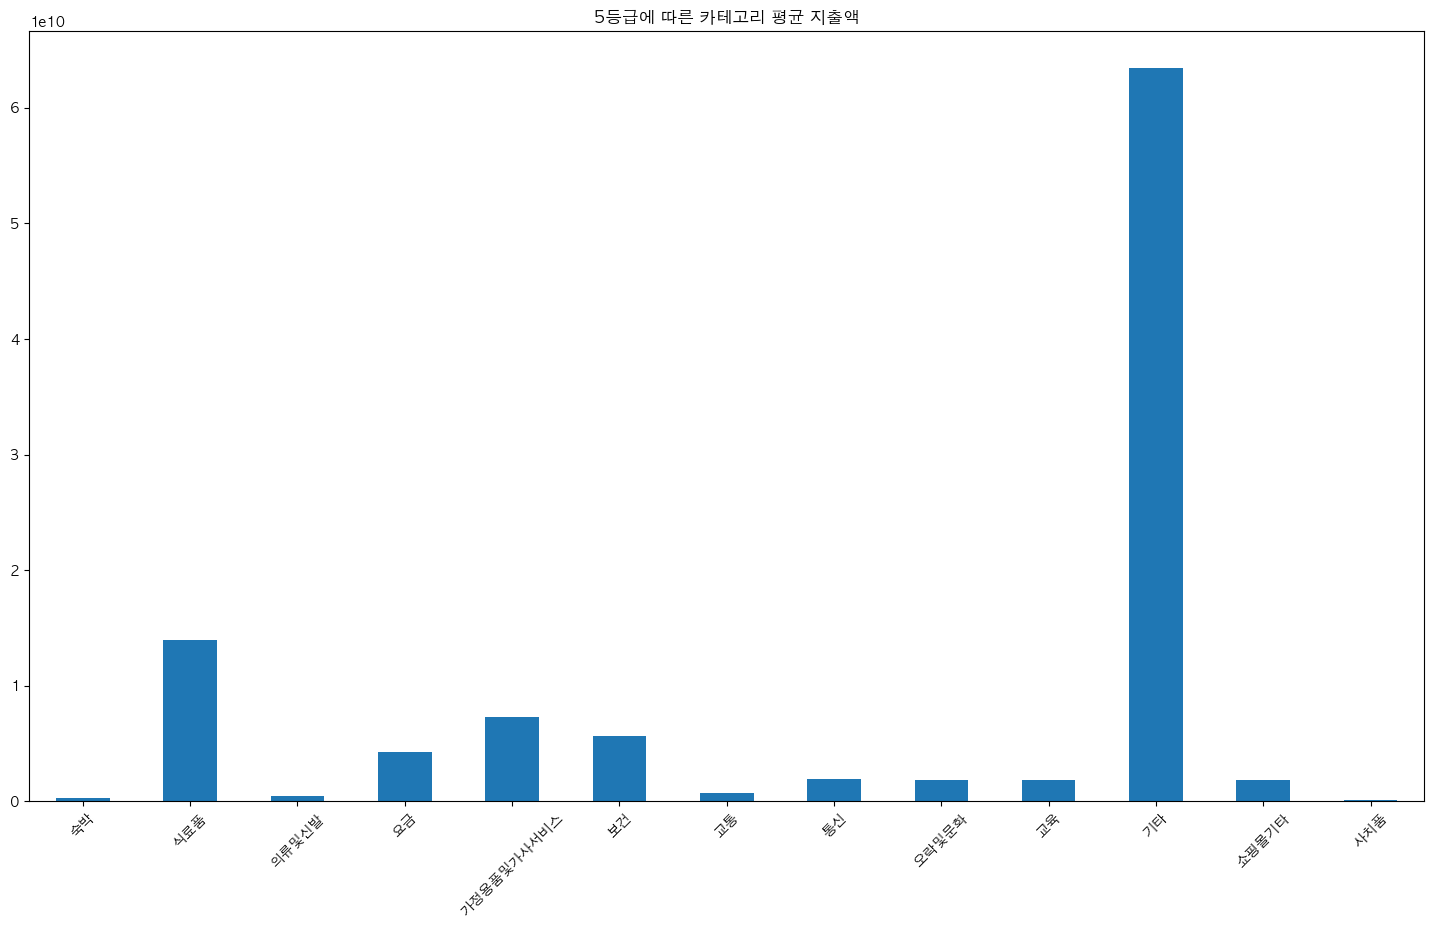

<AxesSubplot:>

Text(0.5, 1.0, '4등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

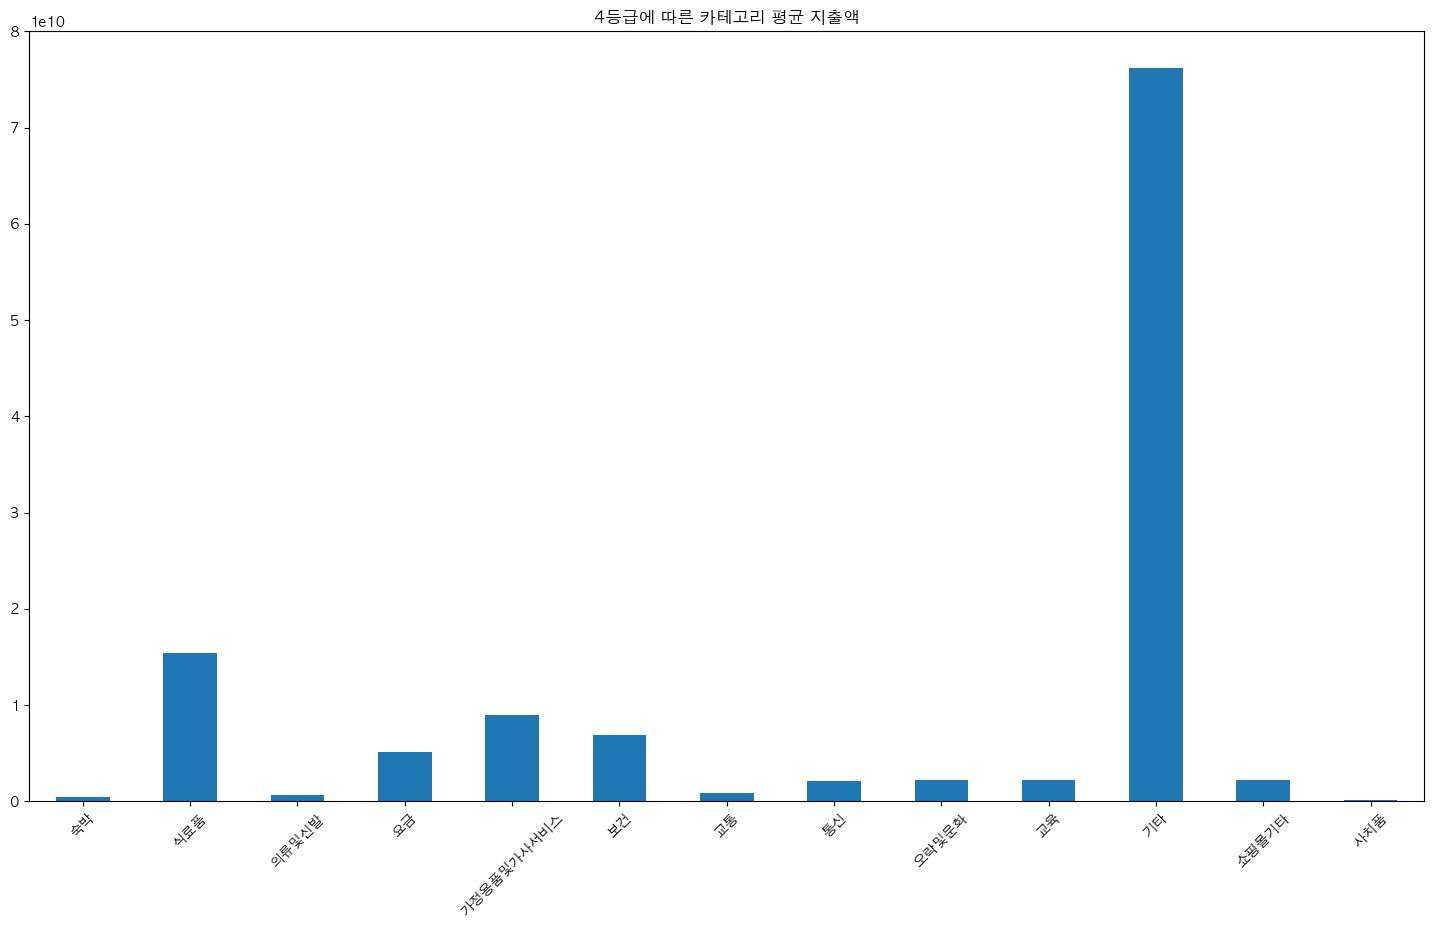

<AxesSubplot:>

Text(0.5, 1.0, '3등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

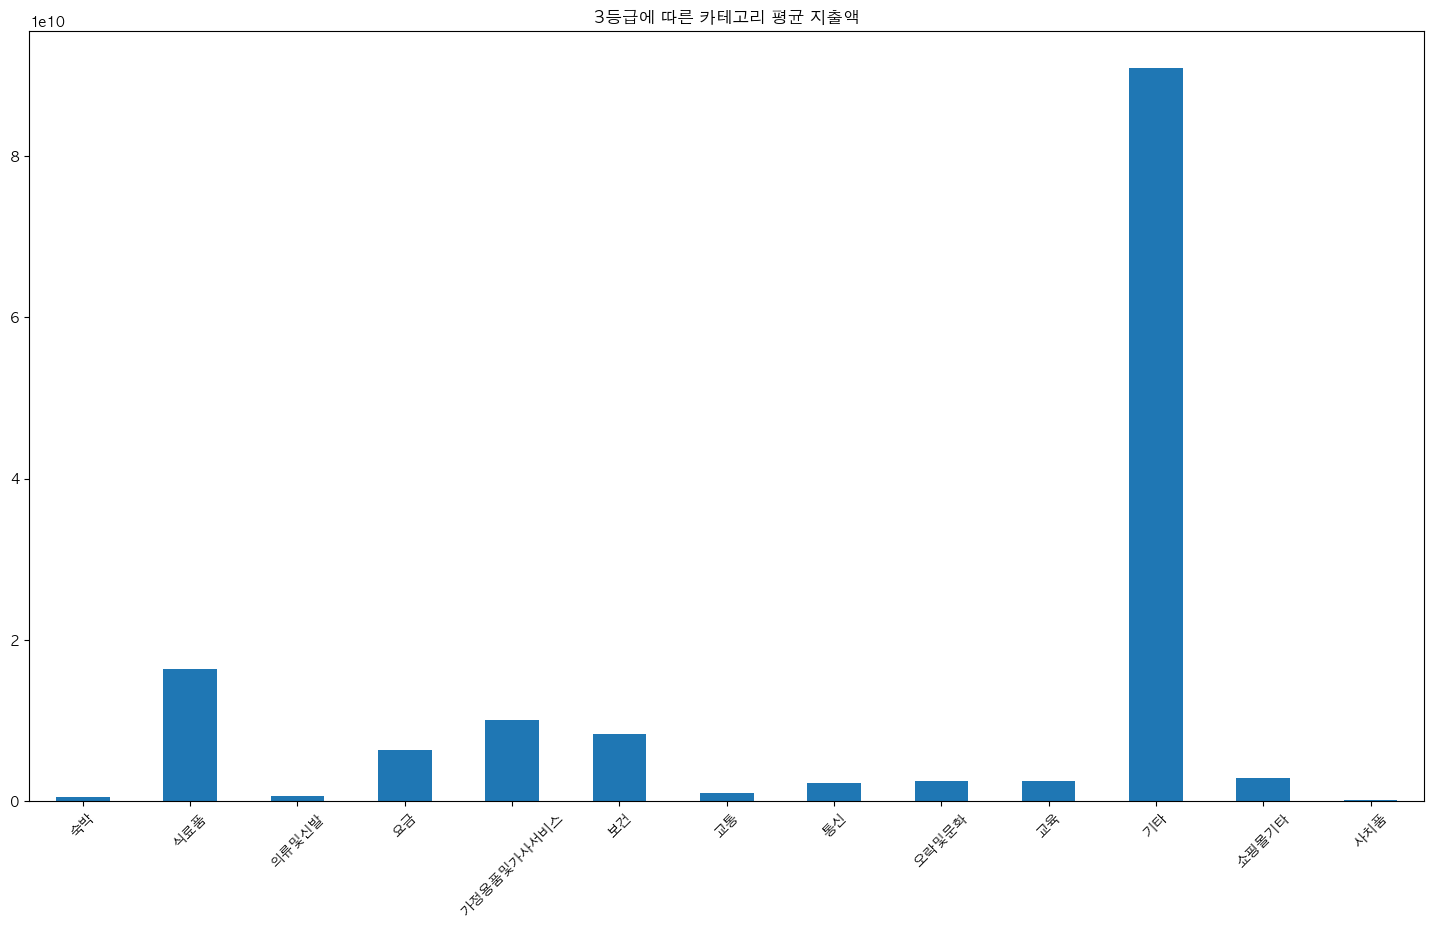

<AxesSubplot:>

Text(0.5, 1.0, '2등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

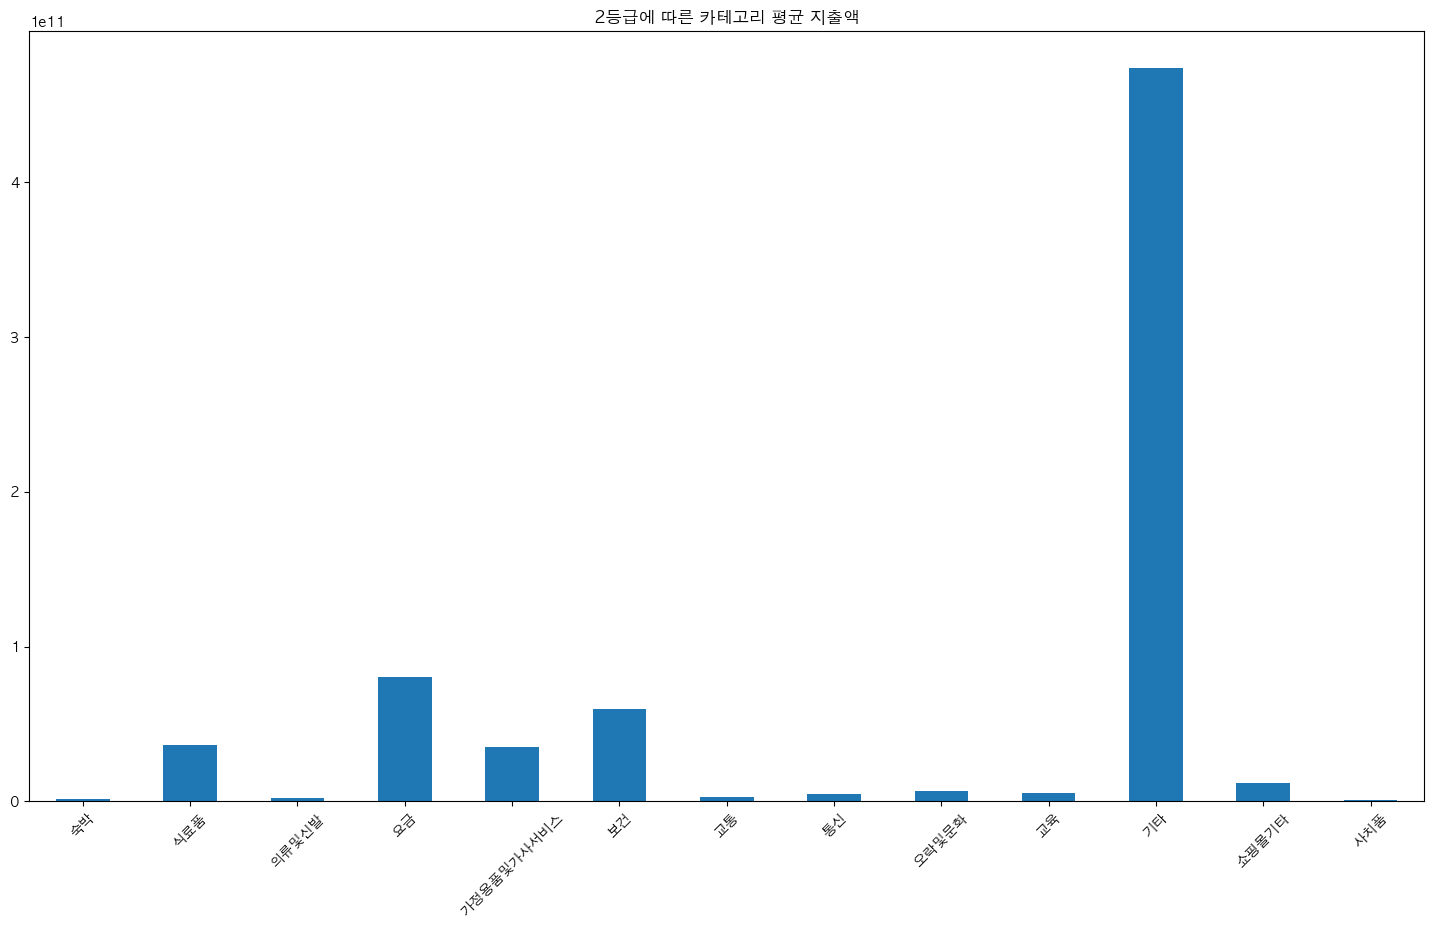

<AxesSubplot:>

Text(0.5, 1.0, '1등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '숙박'),
  Text(1, 0, '식료품'),
  Text(2, 0, '의류및신발'),
  Text(3, 0, '요금'),
  Text(4, 0, '가정용품및가사서비스'),
  Text(5, 0, '보건'),
  Text(6, 0, '교통'),
  Text(7, 0, '통신'),
  Text(8, 0, '오락및문화'),
  Text(9, 0, '교육'),
  Text(10, 0, '기타'),
  Text(11, 0, '쇼핑몰기타'),
  Text(12, 0, '사치품')])

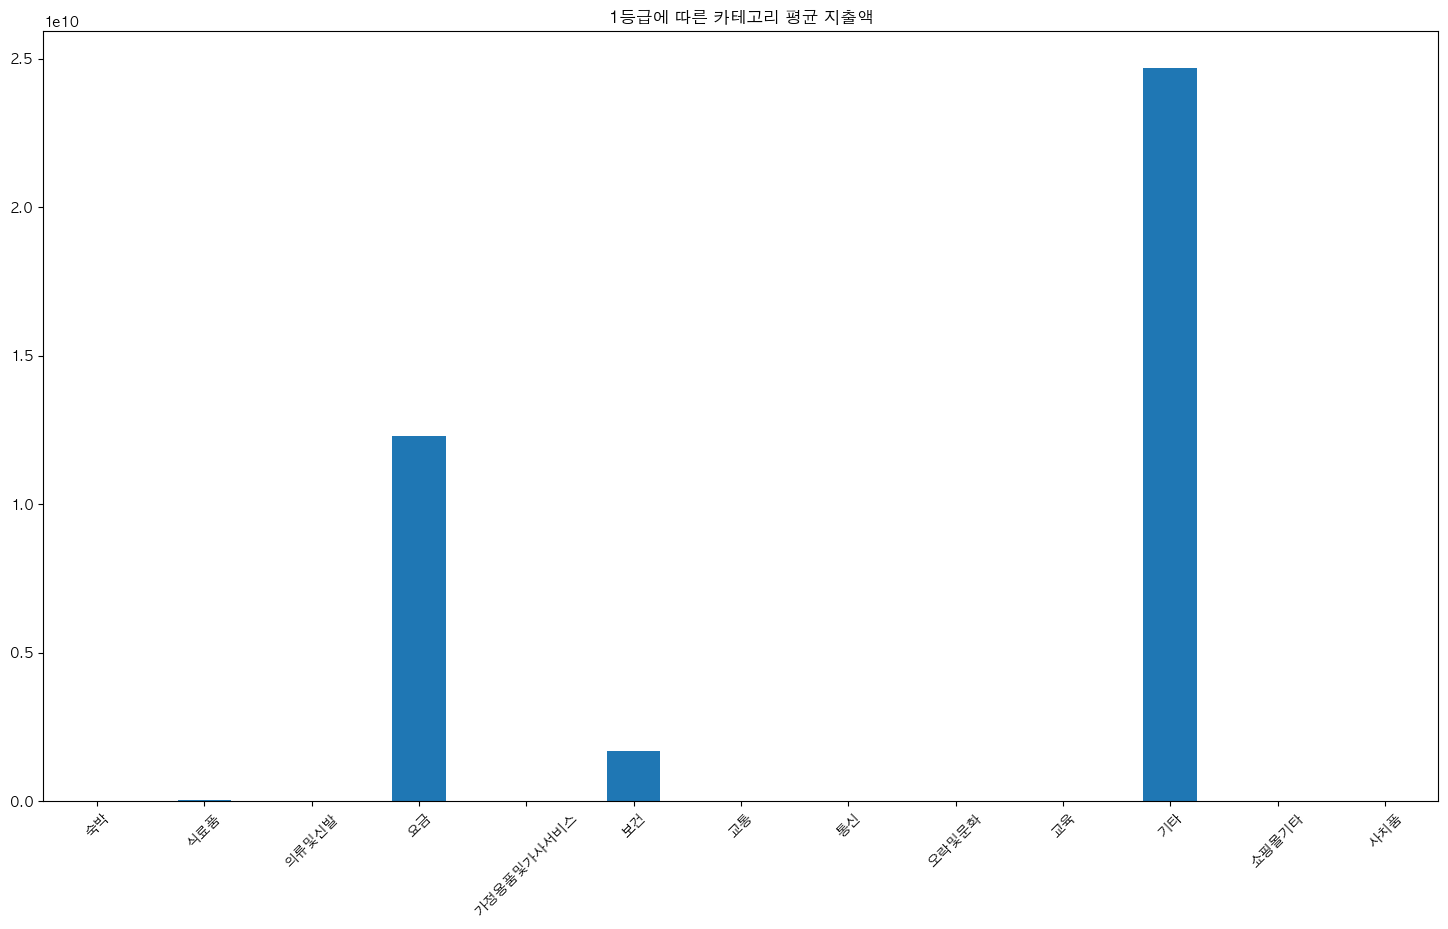

In [27]:
#각 등급에 따른 카테고리별 평균 지출액 
for i in temp_groupby.index:
    temp_groupby_i = temp_groupby.loc[f"{i}"]
    temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
    plt.title(f"{i}에 따른 카테고리 평균 지출액")
    plt.xticks(rotation=45)
    plt.show()



<AxesSubplot:>

Text(0.5, 1.0, '1등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

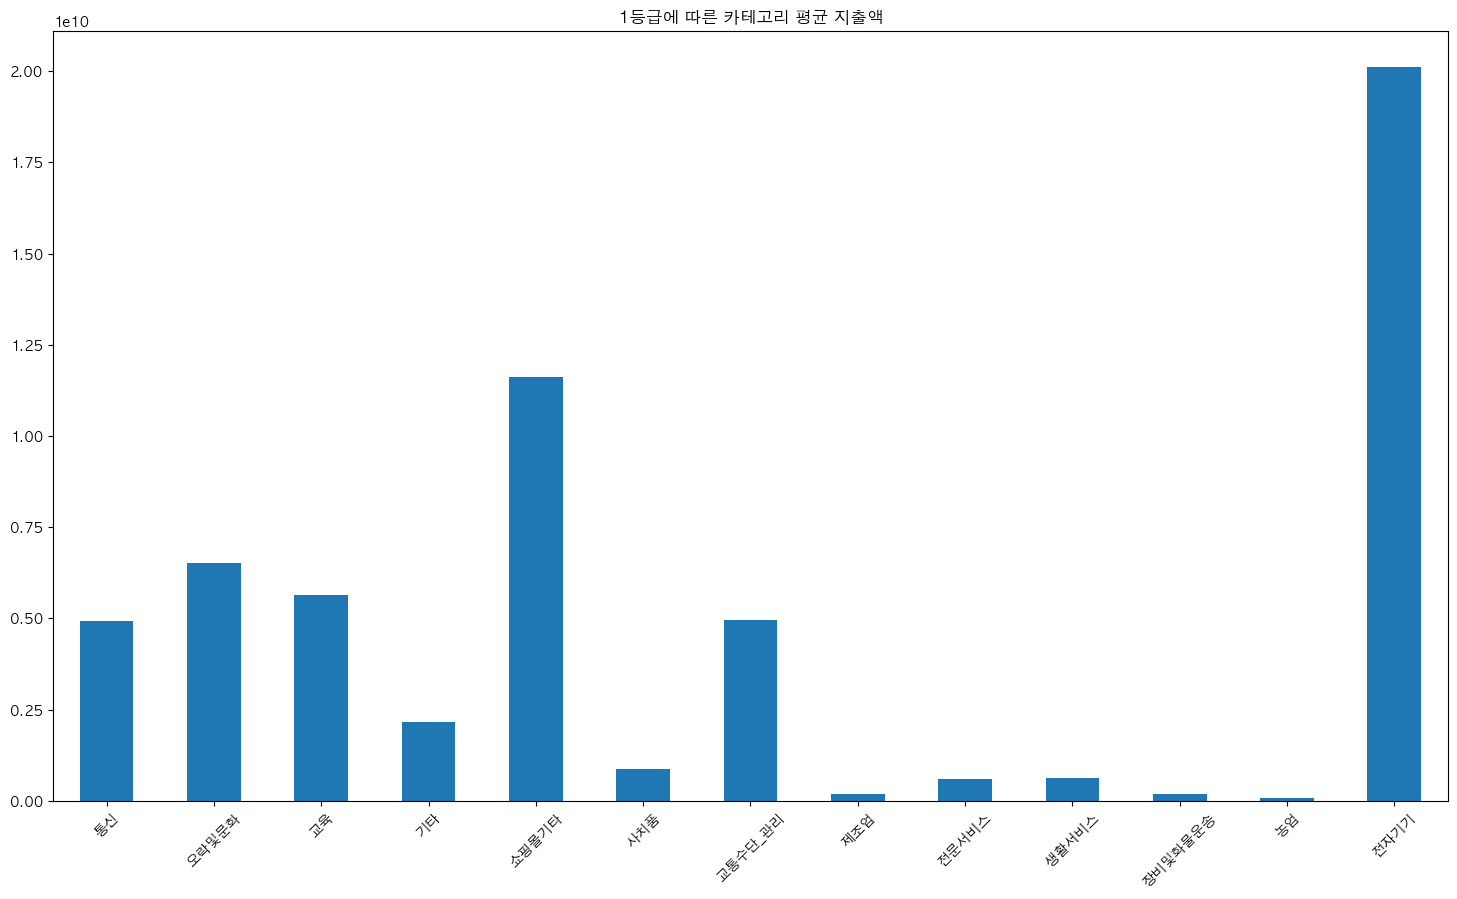

In [98]:
#가독성을 높이기 위해 위의 출력을 나눠서 출력함.

temp_groupby_i = temp_groupby.loc["1등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("1등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

#234 등급에 비해 쇼핑몰에서 사용하는 금액의 크기가 크다.
#그냥 전반적으로 금액의 크기가 크다. 타겟팅할 필요가 있음 

<AxesSubplot:>

Text(0.5, 1.0, '2등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

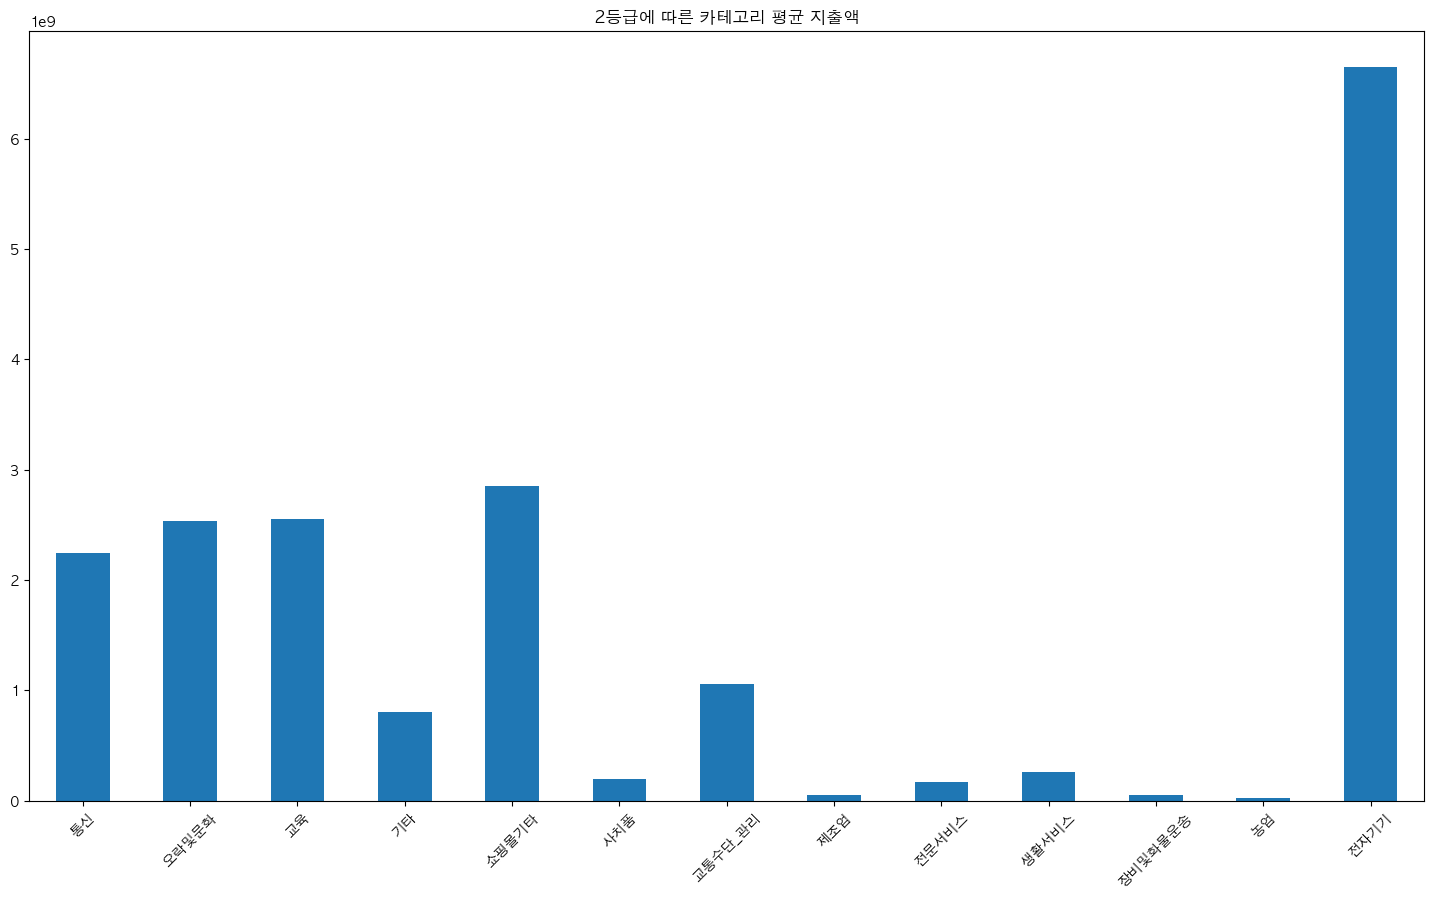

In [99]:
temp_groupby_i = temp_groupby.loc["2등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("2등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()



<AxesSubplot:>

Text(0.5, 1.0, '3등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

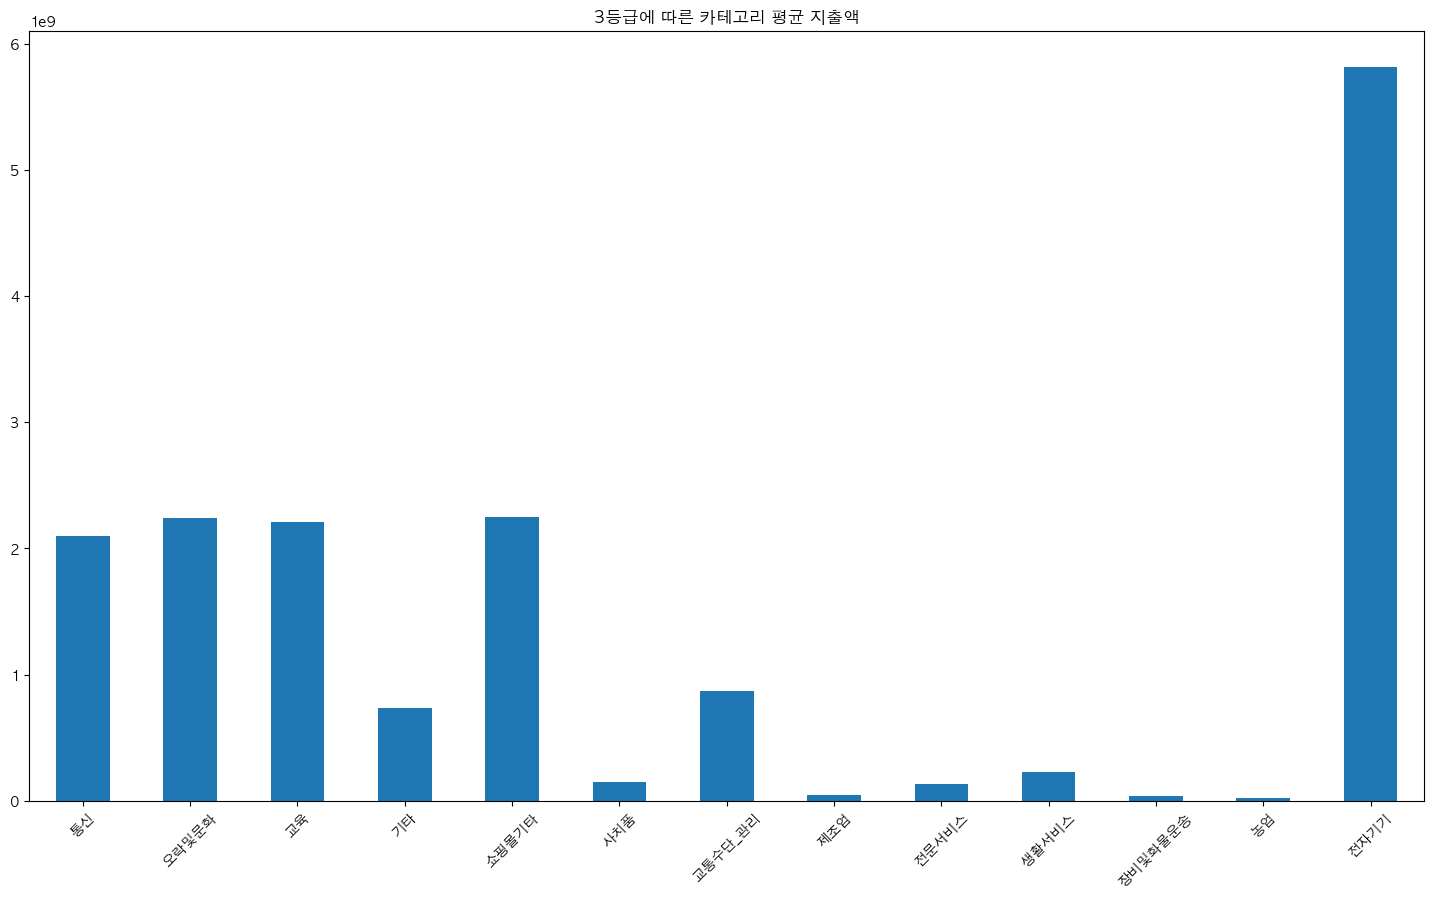

In [100]:
temp_groupby_i = temp_groupby.loc["3등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("3등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, '4등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

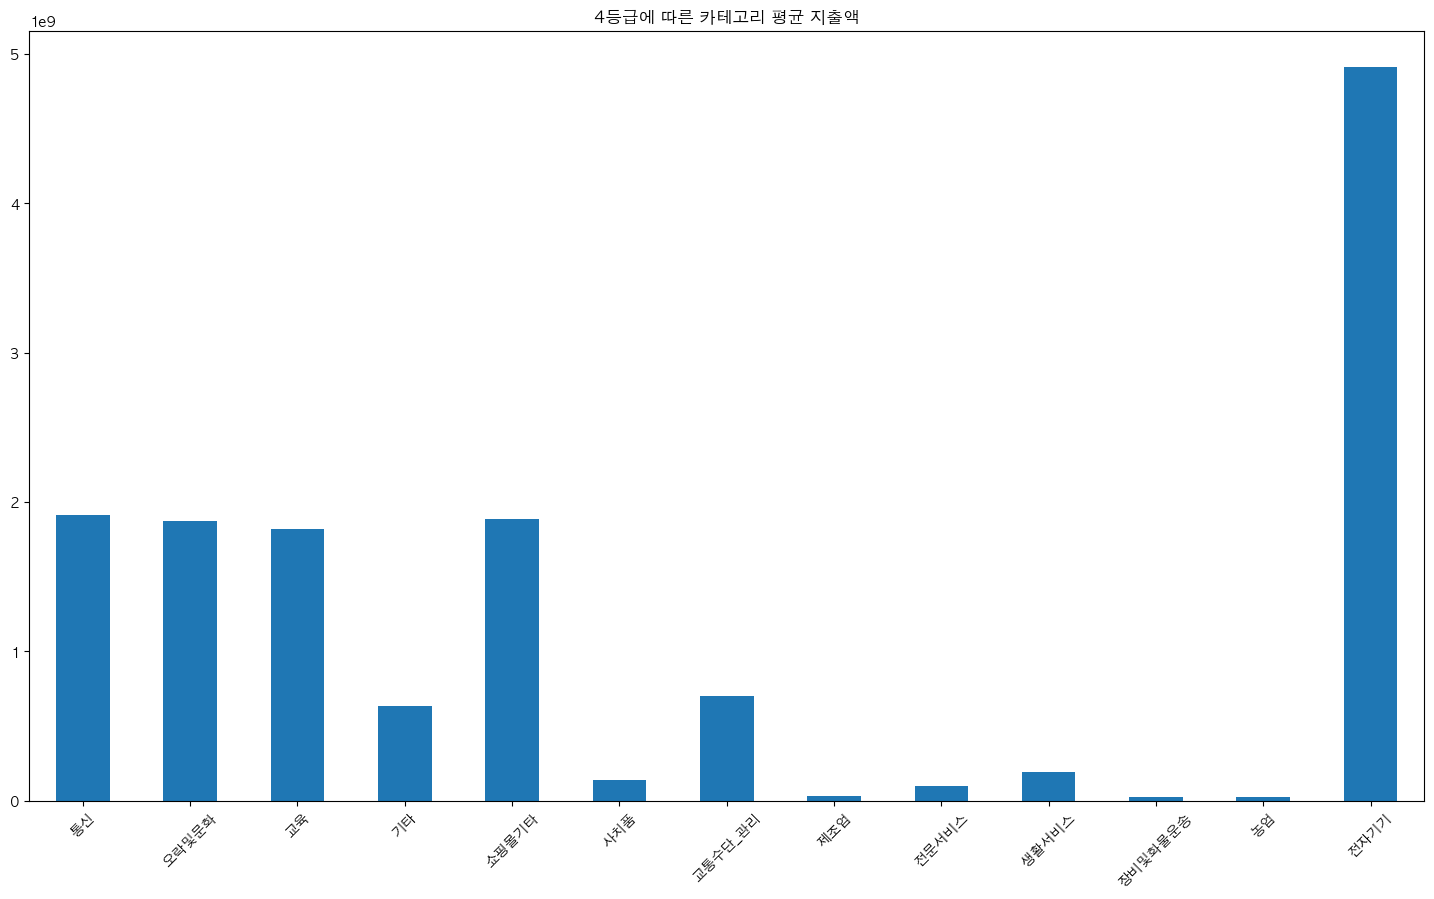

In [101]:
temp_groupby_i = temp_groupby.loc["4등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("4등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, '5등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

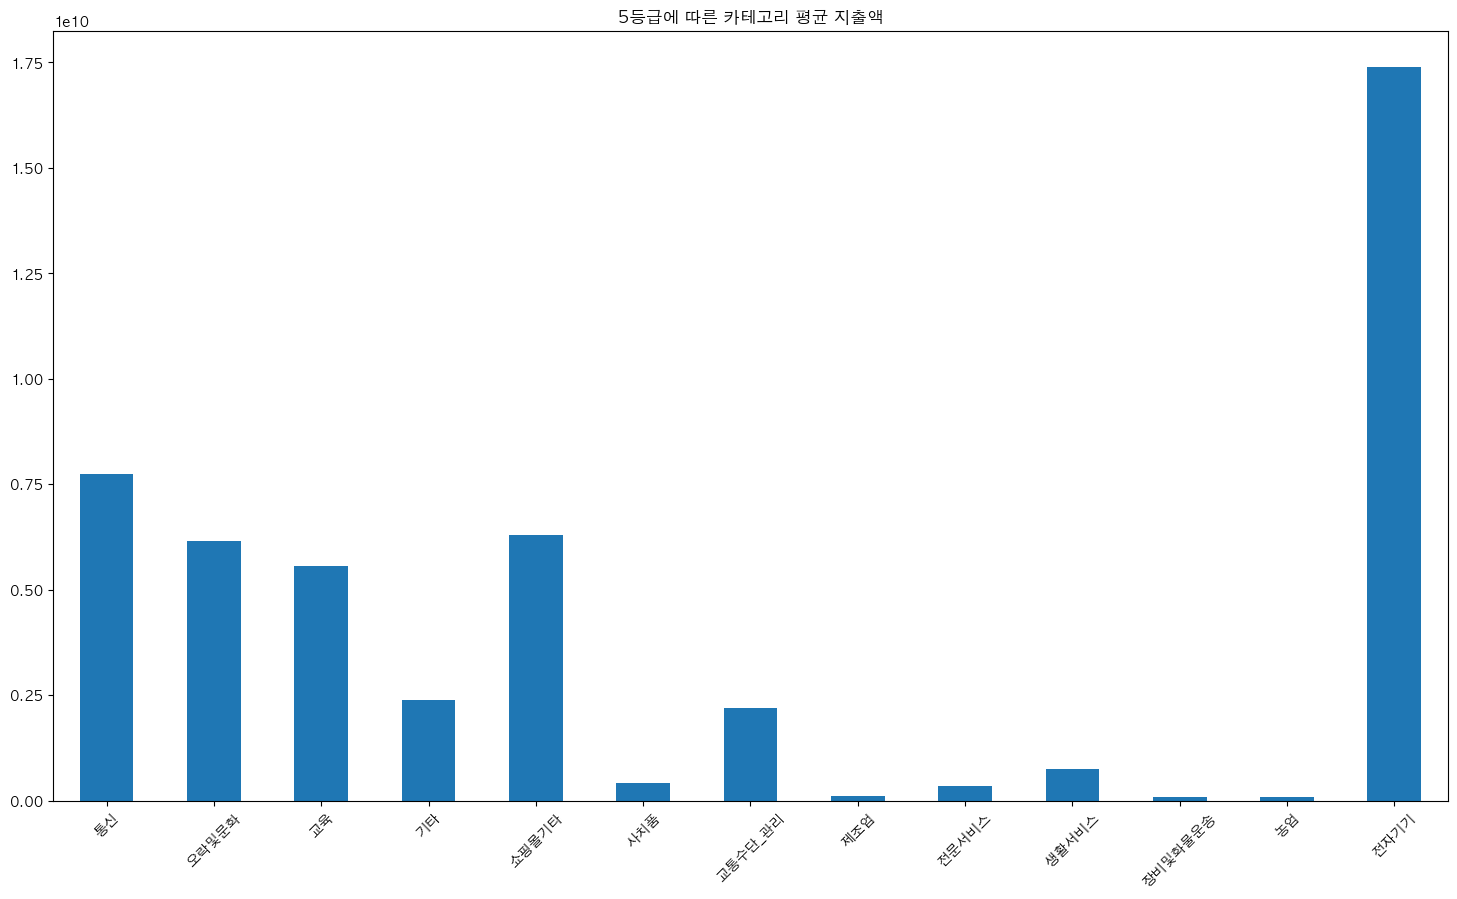

In [102]:
temp_groupby_i = temp_groupby.loc["5등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("5등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()
#지출 "비율"로 따졌을 때 통신이 비교적 높고 교통수단_관리가 비교적 낮다 

<AxesSubplot:>

Text(0.5, 1.0, '6등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

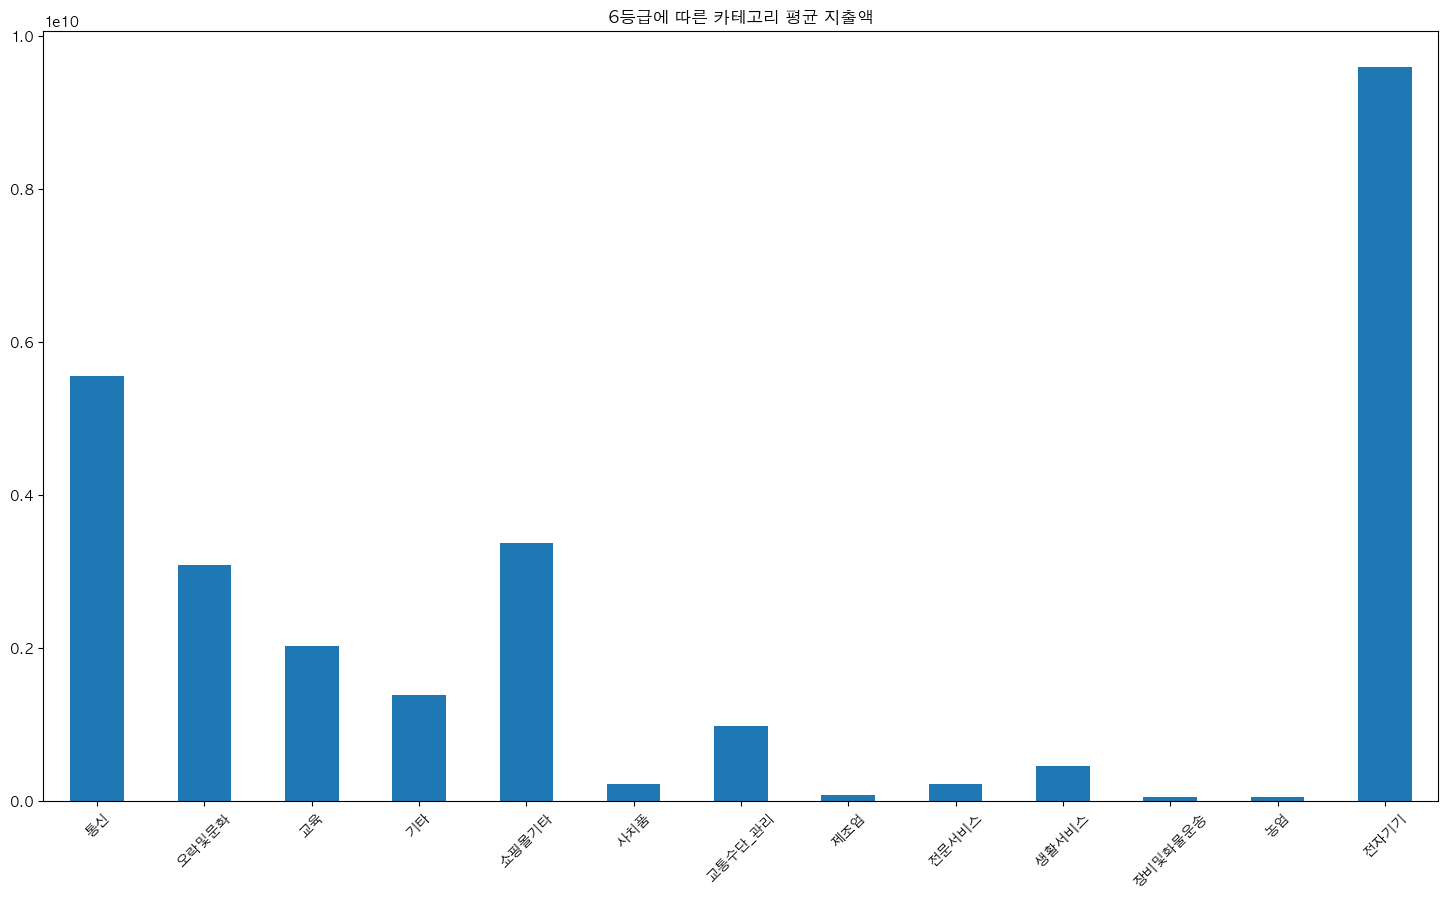

In [103]:
temp_groupby_i = temp_groupby.loc["6등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("6등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()
#통신의 비중이 매우 높다.

<AxesSubplot:>

Text(0.5, 1.0, '7등급에 따른 카테고리 평균 지출액')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '통신'),
  Text(1, 0, '오락및문화'),
  Text(2, 0, '교육'),
  Text(3, 0, '기타'),
  Text(4, 0, '쇼핑몰기타'),
  Text(5, 0, '사치품'),
  Text(6, 0, '교통수단_관리'),
  Text(7, 0, '제조업'),
  Text(8, 0, '전문서비스'),
  Text(9, 0, '생활서비스'),
  Text(10, 0, '장비및화물운송'),
  Text(11, 0, '농업'),
  Text(12, 0, '전자기기')])

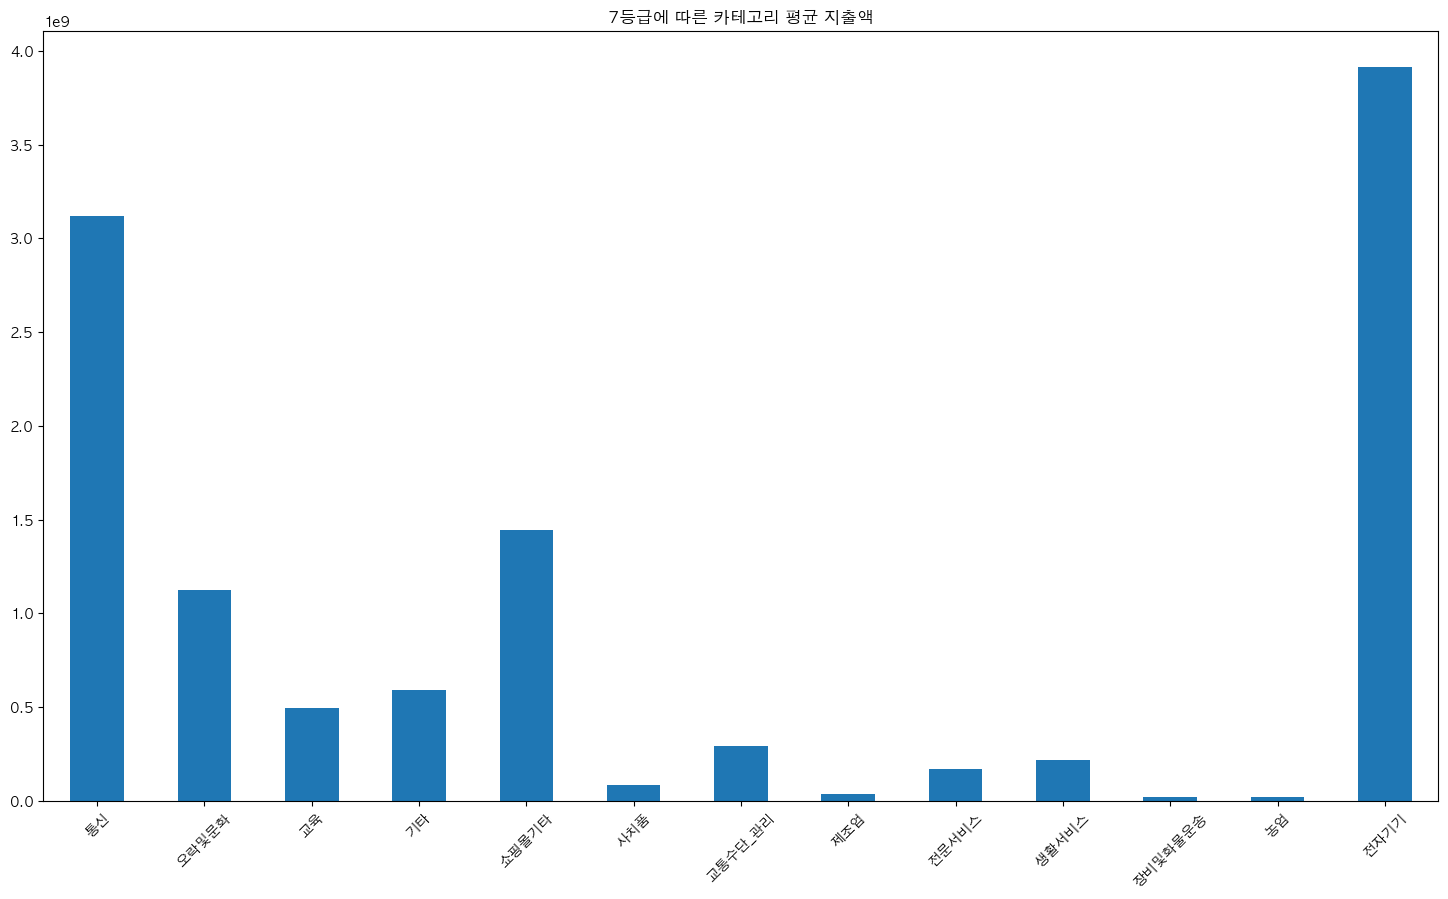

In [104]:
temp_groupby_i = temp_groupby.loc["7등급"]
temp_groupby_i.plot.bar(rot=0, figsize=(18,10))
plt.title("7등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#각 카테고리의 그룹별 평균 지출액 
#구현하면 조금 더 확실하게 나타날 듯 




In [24]:
temp_groupby.iloc[:, -13 :  ]

,숙박,식료품,의류및신발,요금,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품
consume_rank,,,,,,,,,,,,,
5등급,1372.189,164149.134,3316.352,38918.804,49237.796,31611.502,7668.684,26742.407,9620.561,4229.722,508216.952,12387.941,718.444
4등급,3992.453,315750.107,8443.025,90201.757,112859.126,76392.954,13311.381,46694.626,25918.410,16976.096,1097905.573,28410.884,1836.989
3등급,8803.392,473867.296,15067.841,133698.093,210517.114,154688.596,22255.844,65245.758,51714.437,46819.281,1889126.959,53045.499,3501.216
2등급,23838.105,689543.808,30337.002,810794.962,514348.663,675868.323,47220.261,94079.180,110724.606,102845.901,5931995.465,156564.992,11316.786


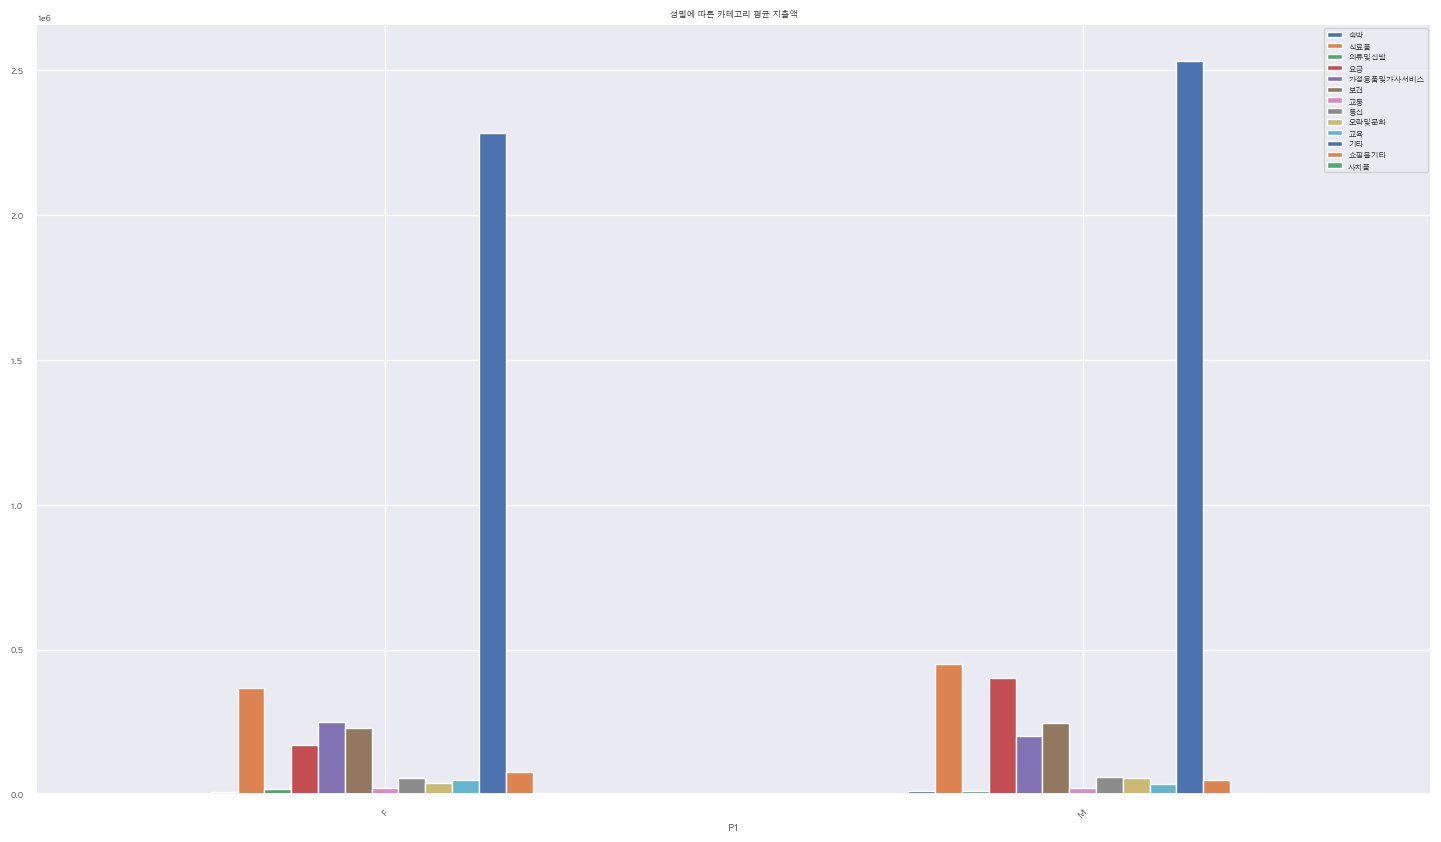

In [47]:
#2.성별/나이에 따른 카테고리 평균 지출액

temp_groupby = temp_dat.groupby(["P1"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("성별에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()



In [1]:
temp_groupby = temp_dat.groupby(["P2"]).sum().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("나이에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()


NameError: name 'temp_dat' is not defined

In [106]:
temp_dat_A은행 = temp_dat.loc[temp_dat["P7"]  == "A은행"]
temp_dat_A증권사 = temp_dat.loc[temp_dat["P7"]  == "A증권사"]
temp_dat_B은행 = temp_dat.loc[temp_dat["P7"]  == "B은행"]
temp_dat_B증권사 = temp_dat.loc[temp_dat["P7"]  == "B증권사"]

temp_dat_A은행_p30 = temp_dat_A은행.loc[temp_dat["P3"]  == 1]
temp_dat_A증권사_p30 = temp_dat_A증권사.loc[temp_dat["P3"]  == 1]
temp_dat_B은행_p30 = temp_dat_B은행.loc[temp_dat["P3"]  == 1]
temp_dat_B증권사_p30 = temp_dat_B증권사.loc[temp_dat["P3"]  == 1]

temp_dat_A은행_p3x = temp_dat_A은행.loc[temp_dat["P3"]  == 0]
temp_dat_A증권사_p3x = temp_dat_A증권사.loc[temp_dat["P3"]  == 0]
temp_dat_B은행_p3x = temp_dat_B은행.loc[temp_dat["P3"]  == 0]
temp_dat_B증권사_p3x = temp_dat_B증권사.loc[temp_dat["P3"]  == 0]



In [107]:
temp_dat_A은행


,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,쇼핑몰기타,사치품,교통수단_관리,제조업,전문서비스,생활서비스,장비및화물운송,농업,전자기기,consume_rank
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,102000,0,0,0,0,0,0,0,135000,1등급
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,0,0,1000,0,0,0,146000,7등급
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,0,0,0,9000,0,0,0,5등급
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,0,0,0,0,0,1등급
12,M,30대_초,1,0,0,1,A은행,0,0,0,...,0,0,0,0,1000,0,0,0,19000,7등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473220,M,40대_후,1,0,0,0,A은행,0,0,0,...,5000,0,0,0,9000,0,0,0,0,7등급
473221,M,50대_초,1,1,0,0,A은행,0,0,0,...,0,0,363000,0,0,15000,0,0,0,6등급
473222,M,20대_후,1,0,0,0,A은행,0,0,0,...,5000,117000,0,0,0,0,0,0,0,5등급
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,48000,0,0,0,0,0,0,0,0,1등급


<AxesSubplot:xlabel='P3'>

Text(0.5, 1.0, '신한은행추정&A은행결제계좌에 따른 카테고리 지출액/건수')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

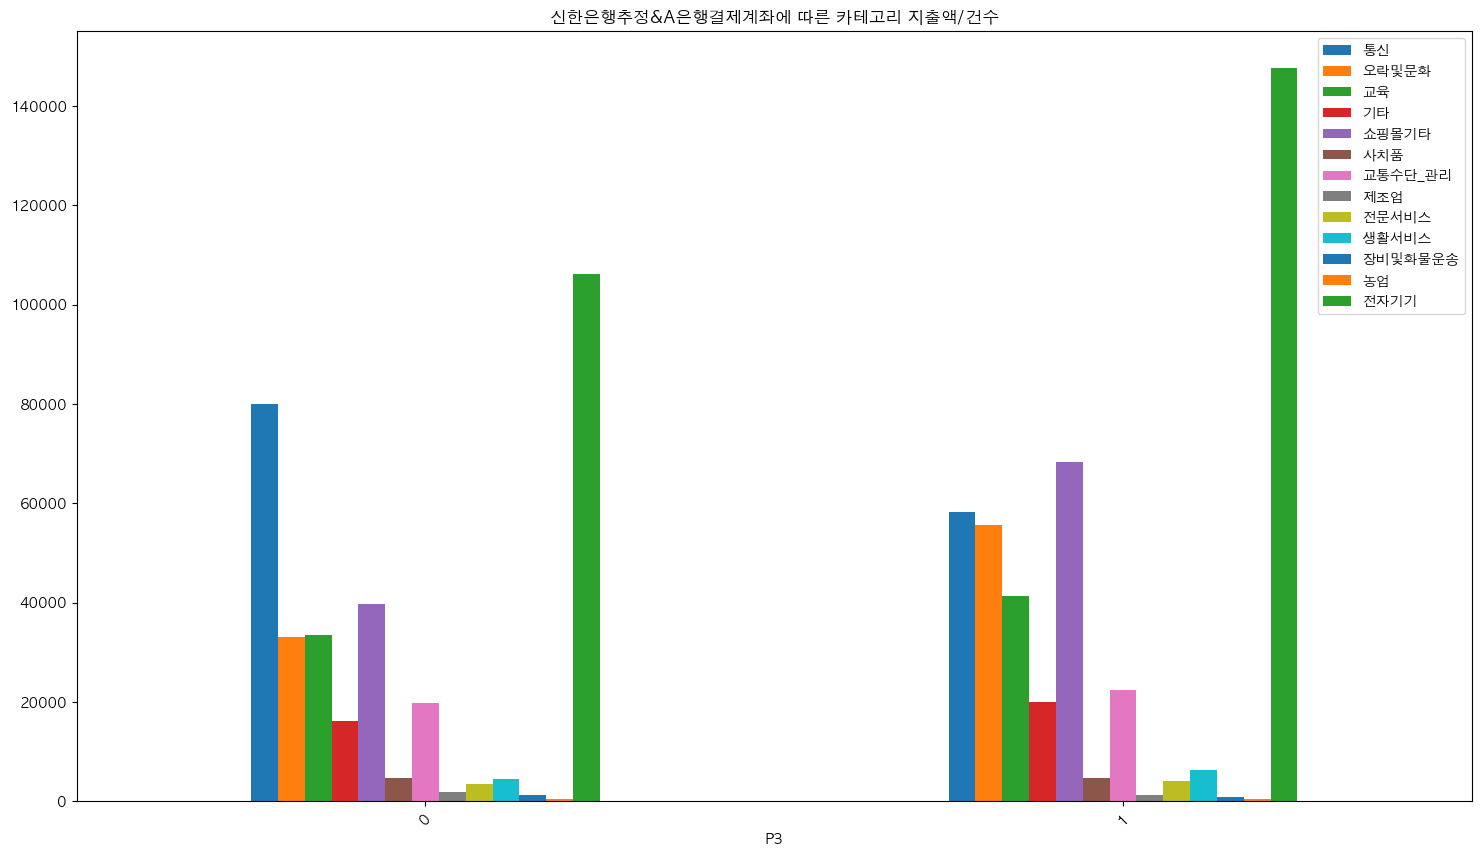

In [108]:
temp_groupby = temp_dat_A은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("신한은행추정&A은행결제계좌에 따른 카테고리 지출액/건수")
plt.xticks(rotation=45)
plt.show()

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x17fc57d90>,
 [Text(0, 0, 'Python'),
  Text(1, 0, 'C++'),
  Text(2, 0, 'Java'),
  Text(3, 0, 'Perl'),
  Text(4, 0, 'Scala'),
  Text(5, 0, 'Lisp')])

Text(0, 0.5, 'Usage')

Text(0.5, 1.0, 'Programming language usage')

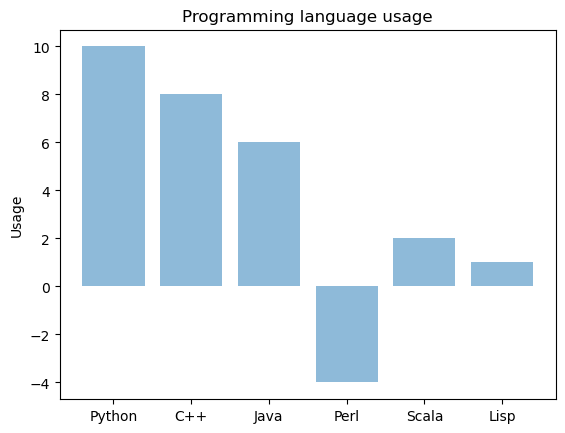

In [121]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt

# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,-4,2,1]

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')

# plt.show()

Text(0.5, 1.0, '신한은행추정&A증권사에 따른 카테고리 평균 지출액')

<AxesSubplot:title={'center':'신한은행추정&A증권사에 따른 카테고리 평균 지출액'}>

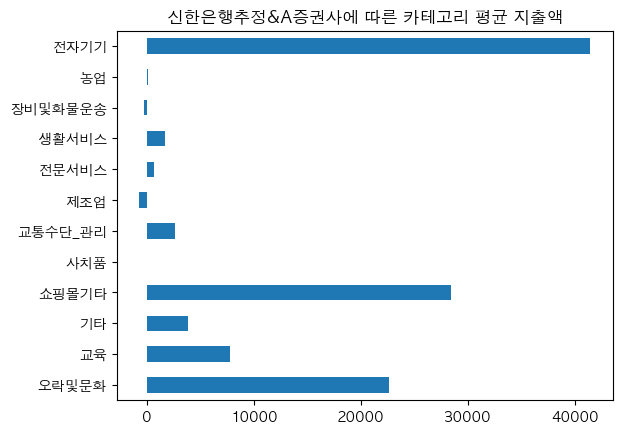

오락및문화      22592.246
교육          7799.717
기타          3833.075
쇼핑몰기타      28481.163
사치품          -34.132
교통수단_관리     2628.042
제조업         -714.656
전문서비스        648.943
생활서비스       1653.300
장비및화물운송     -258.876
농업            69.274
전자기기       41471.059
dtype: float64

In [126]:


diff = temp_dat_A은행_p30.iloc[:, -13:].mean().round(3) - temp_dat_A은행_p3x.iloc[:, -13:].mean().round(3)
# plt.show()
#x = np.arange(len(diff.index))
#plt.bar(x, diff.values, align='center', alpha=0.5)
#plt.xticks(x, diff.index)
#plt.ylabel('평균지출액')
plt.title("신한은행추정&A증권사에 따른 카테고리 평균 지출액")
#plt.xticks(rotation=45)
diff.plot.barh(x=diff.index, y=diff.values);
plt.show(block=True);
# plt.show()

diff

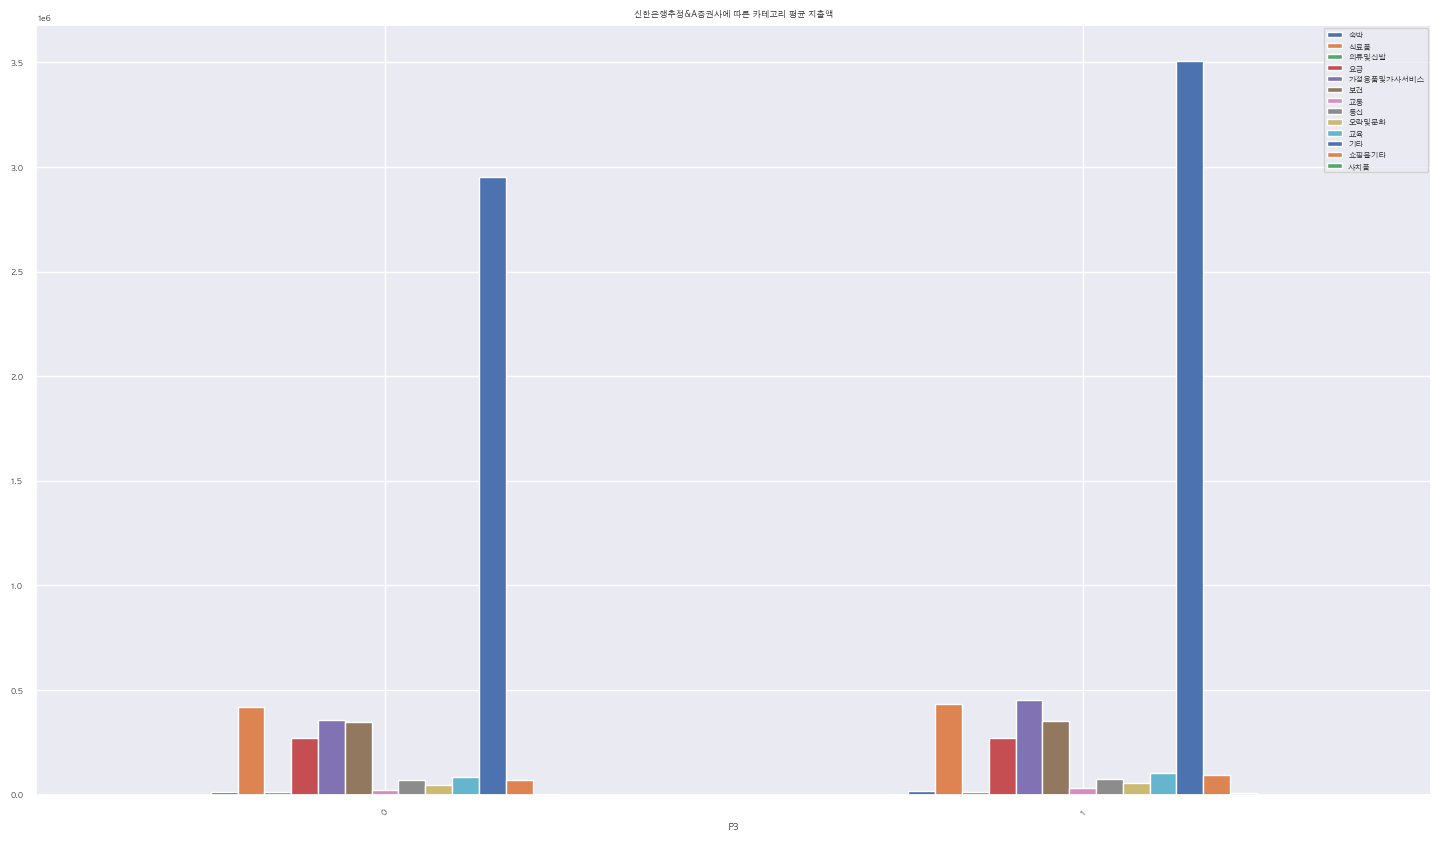

In [54]:
temp_groupby = temp_dat_A증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("신한은행추정&A증권사에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

In [ ]:
diff = temp_dat_A증권사_p30.iloc[:, -13:].mean().round(3) - temp_dat_A증권사_p3x.iloc[:, -13:].mean().round(3)
# plt.show()
#x = np.arange(len(diff.index))
#plt.bar(x, diff.values, align='center', alpha=0.5)
#plt.xticks(x, diff.index)
#plt.ylabel('평균지출액')
plt.title("신한은행추정&A증권사에 따른 카테고리 평균 지출액")
#plt.xticks(rotation=45)
diff.plot.barh(x=diff.index, y=diff.values);
plt.show(block=True);
# plt.show()

diff

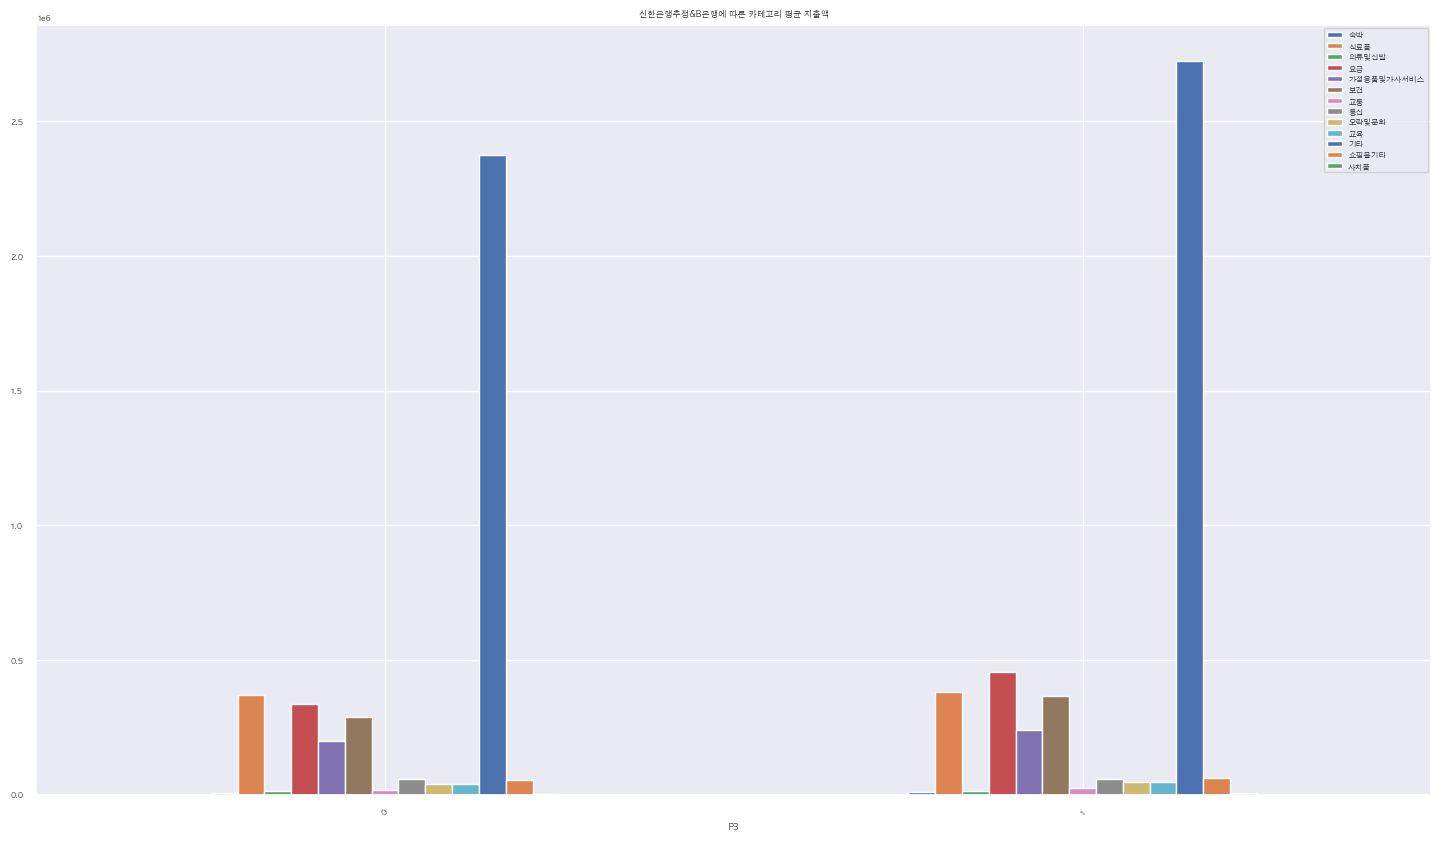

In [55]:
temp_groupby = temp_dat_B은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("신한은행추정&B은행에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

In [ ]:
diff = temp_dat_B은행_p30.iloc[:, -13:].mean().round(3) - temp_dat_B은행_p3x.iloc[:, -13:].mean().round(3)
# plt.show()
#x = np.arange(len(diff.index))
#plt.bar(x, diff.values, align='center', alpha=0.5)
#plt.xticks(x, diff.index)
#plt.ylabel('평균지출액')
plt.title("신한은행추정&A증권사에 따른 카테고리 평균 지출액")
#plt.xticks(rotation=45)
diff.plot.barh(x=diff.index, y=diff.values);
plt.show(block=True);
# plt.show()

diff

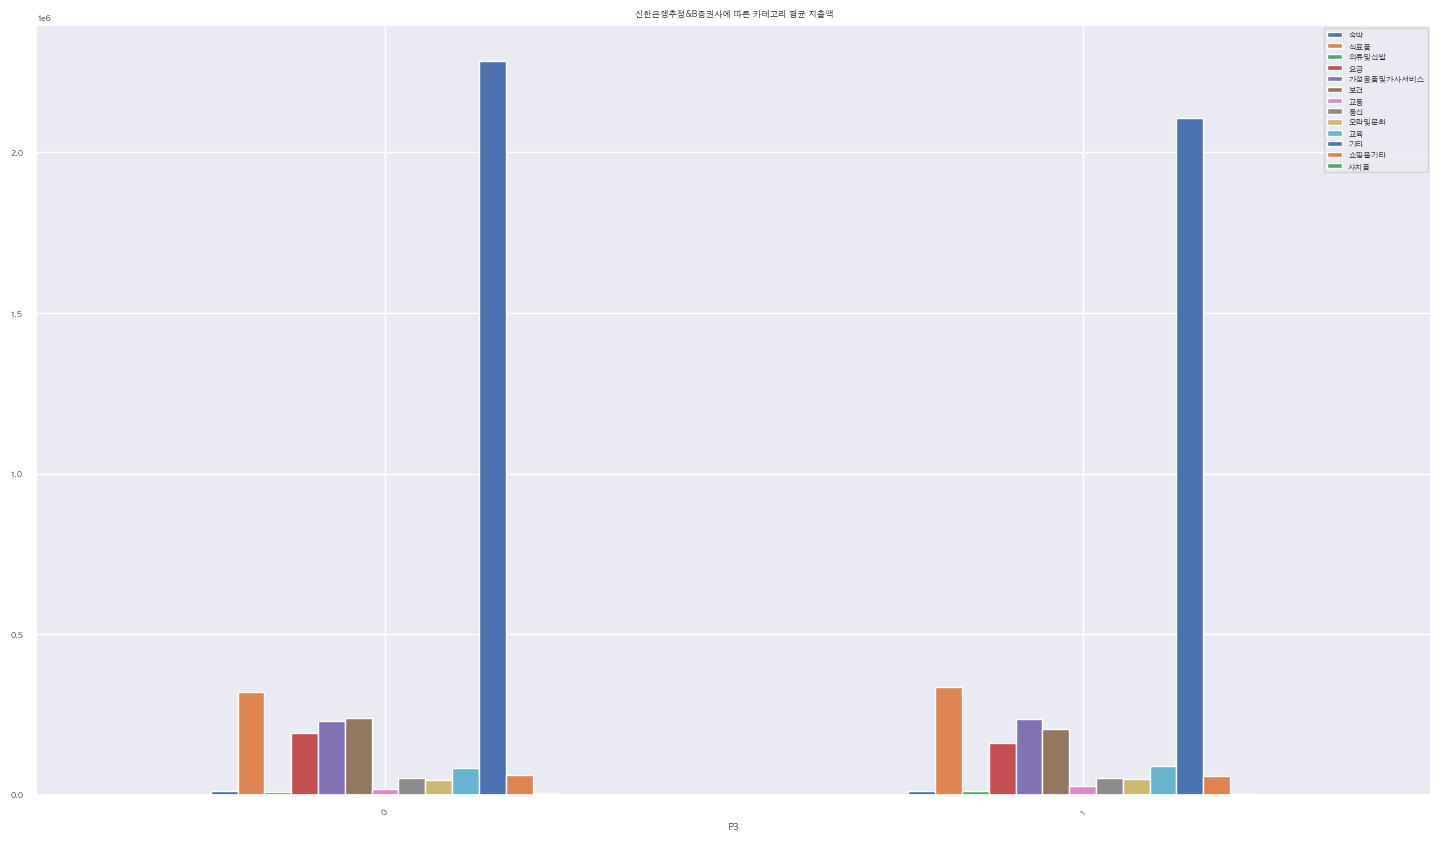

In [56]:
temp_groupby = temp_dat_B증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("신한은행추정&B증권사에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()

In [ ]:
diff = temp_dat_B증권사_p30.iloc[:, -13:].mean().round(3) - temp_dat_B증권사_p3x.iloc[:, -13:].mean().round(3)
# plt.show()
#x = np.arange(len(diff.index))
#plt.bar(x, diff.values, align='center', alpha=0.5)
#plt.xticks(x, diff.index)
#plt.ylabel('평균지출액')
plt.title("신한은행추정&A증권사에 따른 카테고리 평균 지출액")
#plt.xticks(rotation=45)
diff.plot.barh(x=diff.index, y=diff.values);
plt.show(block=True);
# plt.show()

diff

<AxesSubplot:xlabel='index', ylabel='0'>

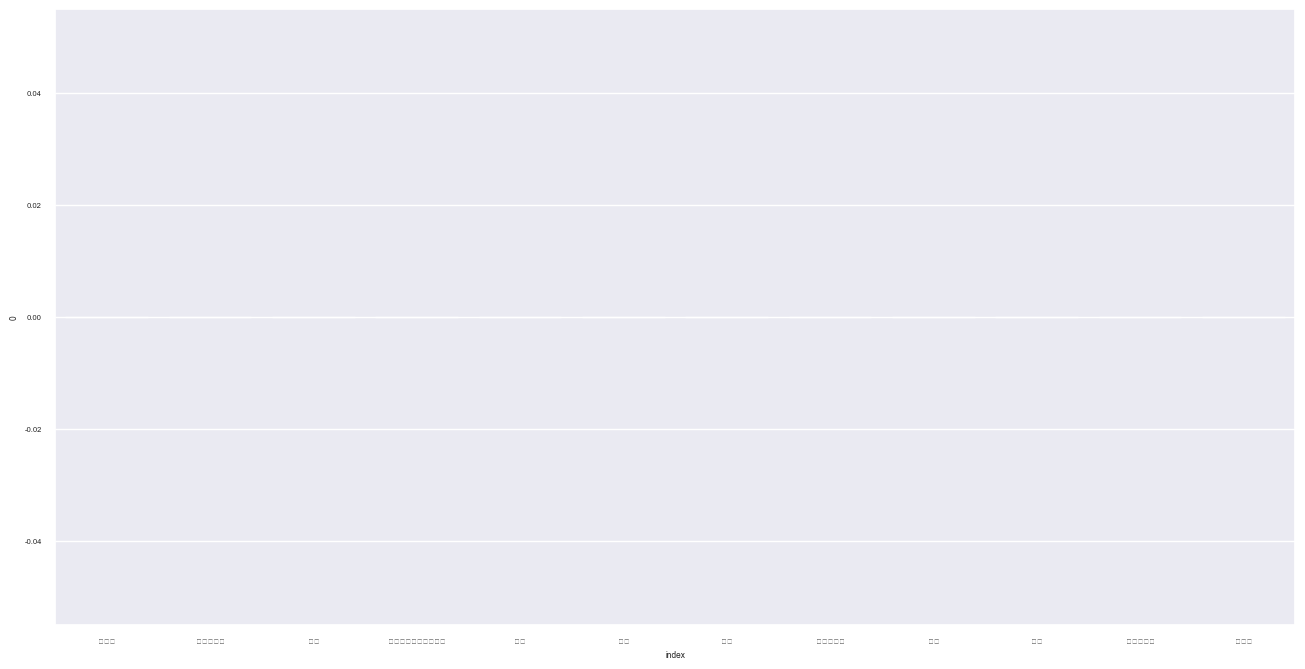

In [28]:

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list




['DejaVu Serif Display',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'cmss10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Serif',
 'cmb10',
 'cmex10',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmsy10',
 'cmtt10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'Thonburi',
 'Apple Chancery',
 'Noto Sans Meroitic',
 'Noto Sans Old North Arabian',
 'Khmer MN',
 'Tinos for Powerline',
 'Noto Sans Sundanese',
 'Source Code Pro for Powerline',
 'Geneva',
 'Tamil Sangam MN',
 'STIXIntegralsUpSm',
 'Source Code Pro for Powerline',
 'Noto Sans Kharoshthi',
 'Meslo LG M for Powerline',
 'Party LET',
 'Sup

In [33]:
#3.은행 활동고객 /결제계좌 에 따른 카테고리 평균 지출액

temp_groupby = temp_dat.groupby(["P1"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("성별에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()


,P3,P4,P5,P6,B1,B2,B3,B4,B5,B6,...,요금,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품
P1,,,,,,,,,,,,,,,,,,,,,
F,0.666,0.580,0.096,0.183,3114.764,239.650,227.457,1525.748,2523.594,204.554,...,170056.835,248068.936,229080.098,22772.256,55621.693,40106.916,51082.329,2283138.172,76942.463,4788.510
M,0.682,0.552,0.105,0.122,3397.543,289.929,289.043,1981.640,5226.371,220.385,...,403355.899,200446.929,247672.036,22600.627,60664.889,57922.014,35827.954,2531639.279,50682.017,3989.708
